#Data Preprocessing

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
!pip install scikit-plot
import scikitplot as skplt


In [0]:
dataset = pd.read_csv('/content/data.csv')
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [0]:
X_data = dataset.iloc[:,2:32]
y_data = dataset.iloc[:,1]

In [0]:
X = dataset.iloc[:,[2,31]].values
y = dataset.iloc[:,[1]].values

In [0]:
y=np.where(y=='M', 1, y) 
y=np.where(y=='B', 0, y) 
y=y.astype('int')

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.28, random_state=0)

In [0]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

#Logistic Regression Model

In [0]:
#Fitting Logistic Regression to Training set
from sklearn.linear_model import LogisticRegression
LRModel = LogisticRegression(random_state =0)
LRModel.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
#predicting test set results
y_LRpred = LRModel.predict(X_test)

In [0]:
y_LRpred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0])

In [0]:
#making confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_LRpred)
cm

array([[91, 11],
       [ 8, 50]])

In [0]:
from sklearn.metrics import *
print(classification_report(y_test, y_LRpred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       102
           1       0.82      0.86      0.84        58

    accuracy                           0.88       160
   macro avg       0.87      0.88      0.87       160
weighted avg       0.88      0.88      0.88       160



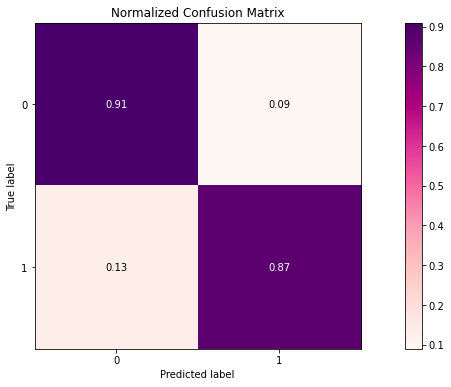

In [0]:
skplt.metrics.plot_confusion_matrix(y_test, y_LRpred, normalize=True,figsize=(16,6), cmap='RdPu')

In [0]:
print(recall_score(y_test, y_LRpred))

0.8620689655172413


In [0]:
from sklearn.model_selection import GridSearchCV
parameters =[{'penalty':['l1', 'l2', 'elasticnet', 'none'],'C':[1,10,100,1000],'random_state':[0],'multi_class':['auto', 'ovr', 'multinomial'],'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}]

In [0]:
grid_search = GridSearchCV(estimator=LRModel,param_grid=parameters,
                           scoring= 'recall',cv=10, n_jobs=-1)

In [0]:
grid_search = grid_search.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
best_accuracy = grid_search.best_score_
best_param = grid_search.best_params_

In [0]:
best_accuracy

0.88375

In [0]:
best_param

{'C': 1,
 'multi_class': 'auto',
 'penalty': 'l1',
 'random_state': 0,
 'solver': 'liblinear'}

In [0]:
LRModel_Grid = LogisticRegression(random_state =0, C=1, penalty='l1',solver='liblinear',multi_class='auto')
LRModel_Grid.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_LRpred_Grid = LRModel_Grid.predict(X_test)

In [0]:
print(recall_score(y_test, y_LRpred_Grid))

0.8793103448275862
